In [79]:
#Dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [2]:
#import scores and stadiums csv files as dataframe

scores_df=pd.read_csv('../project_one/Resources/spreadspoke_scores.csv')
stadium_df=pd.read_csv('../project_one/Resources/nfl_stadiums.csv', encoding="utf-8")

# Check the two dataframes
scores_df.info()
stadium_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13788 entries, 0 to 13787
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   schedule_date        13788 non-null  object 
 1   schedule_season      13788 non-null  int64  
 2   schedule_week        13788 non-null  object 
 3   schedule_playoff     13788 non-null  bool   
 4   team_home            13788 non-null  object 
 5   score_home           13594 non-null  float64
 6   score_away           13594 non-null  float64
 7   team_away            13788 non-null  object 
 8   team_favorite_id     11115 non-null  object 
 9   spread_favorite      11115 non-null  float64
 10  over_under_line      11105 non-null  object 
 11  stadium              13788 non-null  object 
 12  stadium_neutral      13788 non-null  bool   
 13  weather_temperature  12410 non-null  float64
 14  weather_wind_mph     12394 non-null  float64
 15  weather_humidity     8468 non-null  

In [3]:
# Merge scores and stadiums datframes

# The two daraframes have different columns names containg stadium names. Rename one so they match for merging
scores_df.rename(columns = {'stadium':'stadium_name'}, inplace = True)

# Merge two dataframes left on stadium_name
data_df=pd.merge(scores_df, stadium_df, how='left', on='stadium_name' )

In [4]:
# Clean data

# Remove columns not being used for this project

# Define columns to be dropped
drop_list=['stadium_elevation', 
           'stadium_azimuthangle', 
           'stadium_weather_station_name',
           'stadium_weather_station',
           'stadium_weather_station_zipcode',
           'stadium_address',
           'stadium_close',
           'stadium_open',
           'over_under_line',
           'spread_favorite',
           'team_favorite_id',
            ]

# Drop the selected columns
data_df=data_df.drop(drop_list, axis='columns')

# Drop home/away, keep only neutral site games,  <- dataframe for Super Bowl question (Brian!!!!)
super_bowl_data_df=data_df.loc[data_df['schedule_week']=='Superbowl']

# Drop neutral site games, keep only home/away <- main dataframe for most questions
data_df=data_df.loc[data_df['stadium_neutral']==False]

# Look for NaNs in score_home and score_away
data_df["score_home"].unique()
data_df["score_away"].unique()

# Drop NaNs in score_home and score_away
data_df.dropna(subset=['score_home'], inplace=True)
data_df.dropna(subset=['score_away'], inplace=True)

In [5]:
# Check the dataframe to make sure columns were dropped
data_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 13482 entries, 0 to 13593
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   schedule_date         13482 non-null  object 
 1   schedule_season       13482 non-null  int64  
 2   schedule_week         13482 non-null  object 
 3   schedule_playoff      13482 non-null  bool   
 4   team_home             13482 non-null  object 
 5   score_home            13482 non-null  float64
 6   score_away            13482 non-null  float64
 7   team_away             13482 non-null  object 
 8   stadium_name          13482 non-null  object 
 9   stadium_neutral       13482 non-null  bool   
 10  weather_temperature   12255 non-null  float64
 11  weather_wind_mph      12255 non-null  float64
 12  weather_humidity      8448 non-null   float64
 13  weather_detail        2919 non-null   object 
 14  stadium_location      13482 non-null  object 
 15  stadium_type          13

In [6]:
# Add a empty column home_result
data_df["home_result"]=''

In [7]:
# Move new column over to be beside the home and away scores
data_df=data_df.iloc[:,[0,1,2,3,4,5,6,7,21,8,9,10,11,12,13,14,15,16,17,18,19,20]]
#Check coulmn has been added and is in the correct place
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13482 entries, 0 to 13593
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   schedule_date         13482 non-null  object 
 1   schedule_season       13482 non-null  int64  
 2   schedule_week         13482 non-null  object 
 3   schedule_playoff      13482 non-null  bool   
 4   team_home             13482 non-null  object 
 5   score_home            13482 non-null  float64
 6   score_away            13482 non-null  float64
 7   team_away             13482 non-null  object 
 8   home_result           13482 non-null  object 
 9   stadium_name          13482 non-null  object 
 10  stadium_neutral       13482 non-null  bool   
 11  weather_temperature   12255 non-null  float64
 12  weather_wind_mph      12255 non-null  float64
 13  weather_humidity      8448 non-null   float64
 14  weather_detail        2919 non-null   object 
 15  stadium_location      13

In [8]:
# Fill column home_result to show if home team won (W), lost (L) or tied (T) 
# based on relationship between home score and away score

data_df['home_result'] = data_df.apply(lambda x:'Win' if x['score_home'] > x['score_away'] else "Loss or Tie",axis=1)

# Check 
data_df


,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,home_result,stadium_name,...,weather_wind_mph,weather_humidity,weather_detail,stadium_location,stadium_type,stadium_weather_type,stadium_capacity,stadium_surface,stadium_latitude,stadium_longitude
0,9/2/1966,1966,1,False,Miami Dolphins,14.0,23.0,Oakland Raiders,Loss or Tie,Orange Bowl,...,6.0,71.0,NaN,"Miami, FL",outdoor,warm,NaN,NaN,25.790500,-80.316300
1,9/3/1966,1966,1,False,Houston Oilers,45.0,7.0,Denver Broncos,Win,Rice Stadium,...,7.0,70.0,NaN,"Houston, TX",outdoor,warm,NaN,Grass,NaN,NaN
2,9/4/1966,1966,1,False,San Diego Chargers,27.0,7.0,Buffalo Bills,Win,Balboa Stadium,...,7.0,82.0,NaN,"San Diego, CA",outdoor,warm,NaN,Grass,NaN,NaN
3,9/9/1966,1966,2,False,Miami Dolphins,14.0,19.0,New York Jets,Loss or Tie,Orange Bowl,...,11.0,78.0,NaN,"Miami, FL",outdoor,warm,NaN,NaN,25.790500,-80.316300
4,9/10/1966,1966,1,False,Green Bay Packers,24.0,3.0,Baltimore Colts,Win,Lambeau Field,...,8.0,62.0,NaN,"Green Bay, WI",outdoor,cold,"80,735",Grass,44.501389,-88.062222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13589,10/8/2023,2023,5,False,Minnesota Vikings,20.0,27.0,Kansas City Chiefs,Loss or Tie,U.S. Bank Stadium,...,0.0,NaN,indoor,"Minneapolis, MN",indoor,indoor,"66,200",FieldTurf,44.973889,-93.258056
13590,10/8/2023,2023,5,False,New England Patriots,0.0,34.0,New Orleans Saints,Loss or Tie,Gillette Stadium,...,NaN,NaN,NaN,"Foxborough, MA",outdoor,cold,"68,756",FieldTurf,42.091000,-71.264000
13591,10/8/2023,2023,5,False,Pittsburgh Steelers,17.0,10.0,Baltimore Ravens,Win,Acrisure Stadium,...,NaN,NaN,NaN,"Pittsburgh, PA",outdoor,cold,"65,500",Grass,40.484600,-80.214400
13592,10/8/2023,2023,5,False,San Francisco 49ers,42.0,10.0,Dallas Cowboys,Win,Levi's Stadium,...,NaN,NaN,NaN,"Santa Clara, CA",outdoor,moderate,"68,500",Grass,37.403000,-121.970000


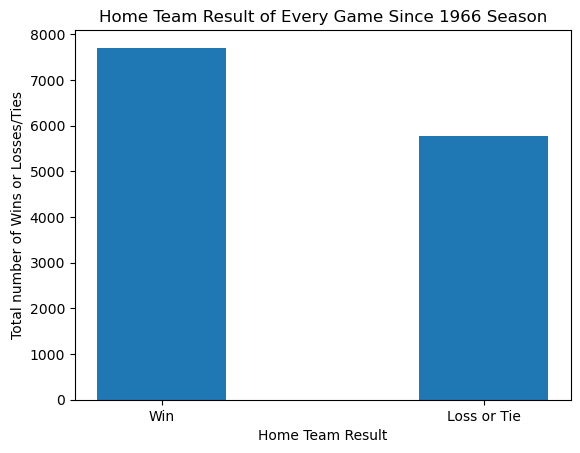

In [9]:
# Bar chart of total home wins and total losses/ties for entire dataset


# Make small dataframe with total numbers of Wins or Losses/Ties from main dataframe
summary=pd.DataFrame(data_df['home_result'].value_counts())


# From small dataframe, grab index and counts for bar graph
result=summary.index
counts=summary['count']

# Plot bar graph
plt.bar(result, counts, width = 0.4)

plt.xlabel('Home Team Result')
plt.ylabel('Total number of Wins or Losses/Ties')
plt.title("Home Team Result of Every Game Since 1966 Season")

plt.show()



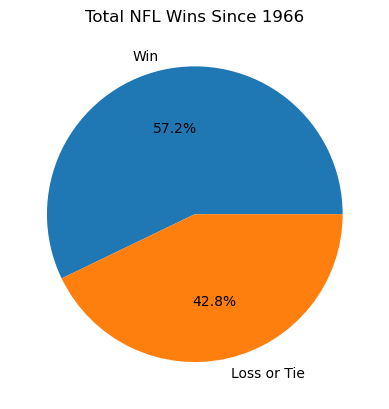

In [36]:
total_wins_df = data_df["home_result"].value_counts()
total_wins_df
plt.pie(total_wins_df, labels=('Win', 'Loss or Tie'), autopct='%1.1f%%')
plt.title("Total NFL Wins Since 1966")
plt.show()

In [10]:
mean_weather_temp = data_df.groupby("home_result")["weather_temperature"].mean()
mean_weather_temp
mean_weather_wind = data_df.groupby("home_result")["weather_wind_mph"].mean()
mean_weather_wind
mean_weather_humid = data_df.groupby("home_result")["weather_humidity"].mean()
mean_weather_humid
#home_result = data_df["home_result"]
weather_summary = pd.DataFrame({"Mean Temperature": mean_weather_temp,"Mean Wind Speed": mean_weather_wind, "Mean Humidity": mean_weather_humid})
weather_summary

,Mean Temperature,Mean Wind Speed,Mean Humidity
home_result,,,
Loss or Tie,59.456294,7.481242,67.392787
Win,58.359652,7.816105,67.082670


In [11]:
print(data_df.groupby(["home_result"]).agg({"weather_temperature":["mean", "median", "var", "std", "sem"]}).reset_index())

   home_result weather_temperature                                        
                              mean median         var        std       sem
0  Loss or Tie           59.456294   62.0  232.219947  15.238765  0.210295
1          Win           58.359652   61.0  249.044843  15.781155  0.188567


In [12]:
print(data_df.groupby(["home_result"]).agg({"weather_wind_mph":["mean", "median", "var", "std", "sem"]}).reset_index())

   home_result weather_wind_mph                                      
                           mean median        var       std       sem
0  Loss or Tie         7.481242    8.0  32.692743  5.717757  0.078905
1          Win         7.816105    8.0  32.103262  5.665974  0.067702


In [13]:
print(data_df.groupby(["home_result"]).agg({"weather_humidity":["mean", "median", "var", "std", "sem"]}).reset_index())

   home_result weather_humidity                                        
                           mean median         var        std       sem
0  Loss or Tie        67.392787   70.0  253.177129  15.911541  0.267091
1          Win        67.082670   69.0  246.213867  15.691203  0.224183


In [14]:
#weather_type = data_df.set_index("home_result")["stadium_weather_type"]
#weather_type
weather_df = data_df.groupby("home_result")["stadium_weather_type"].value_counts()
weather_df
#data_df.info()
#warm_weather_win = data_df[(data_df["home_result"] == "Win") & (data_df["stadium_weather_type"] == "warm")]
#cold_weather_win = data_df[(data_df["home_result"] == "Win") & (data_df["stadium_weather_type"] == "cold")]
#indoor_weather_win = data_df[(data_df["home_result"] == "Win") & (data_df["stadium_weather_type"] == "indoor")]
#moderate_weather_win = data_df[(data_df["home_result"] == "Win") & (data_df["stadium_weather_type"] == "moderate")]
#moderate_weather_win

home_result  stadium_weather_type
Loss or Tie  cold                    2435
             indoor                  1280
             moderate                1043
             warm                    1008
Win          cold                    3386
             moderate                1580
             indoor                  1526
             warm                    1206
Name: count, dtype: int64

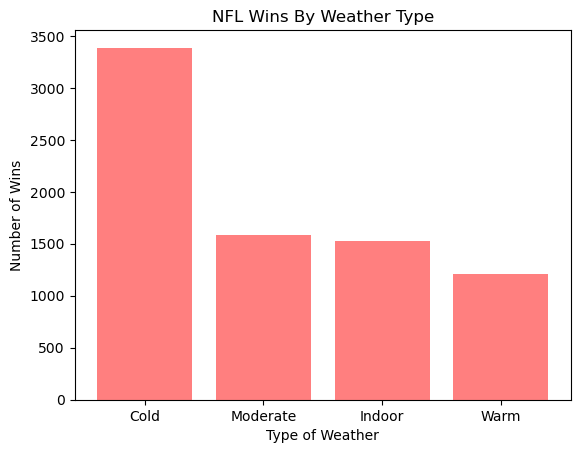

In [15]:
results = [3386, 1580, 1526, 1206]
x_axis = np.arange(len(results))
plt.bar(x_axis, results, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Cold", "Moderate", "Indoor", "Warm"])
plt.title("NFL Wins By Weather Type")
plt.xlabel("Type of Weather")
plt.ylabel("Number of Wins")
plt.show()

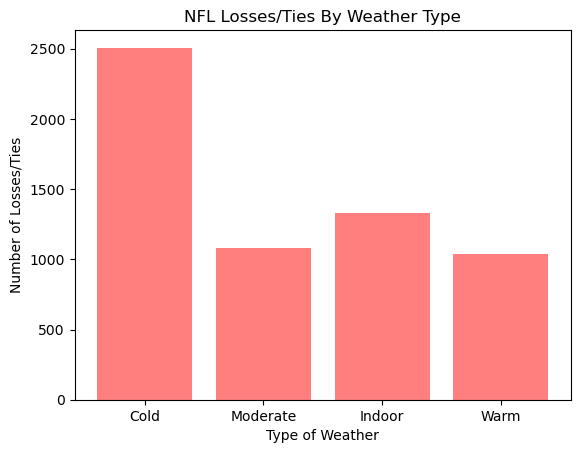

In [16]:
results = [2507, 1078, 1332, 1040]
x_axis = np.arange(len(results))
plt.bar(x_axis, results, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Cold", "Moderate", "Indoor", "Warm"])
plt.title("NFL Losses/Ties By Weather Type")
plt.xlabel("Type of Weather")
plt.ylabel("Number of Losses/Ties")
plt.show()


In [17]:
data_df["home_result"].count()

13482

In [18]:
total_moderate_weather_count = 1580 + 1078
total_moderate_weather = data_df[(data_df["stadium_weather_type"] == "moderate")]
total_moderate_weather
#percentage_win_moderate = 1580/total_moderate_weather_count
percentage_win_moderate = 1580/(1580 + 1078)
percentage_win_moderate

0.5944319036869827

In [19]:
overall_win_percent = (3386 + 1580 + 1526 + 1206)/13673 
overall_win_percent

0.5630073868207416

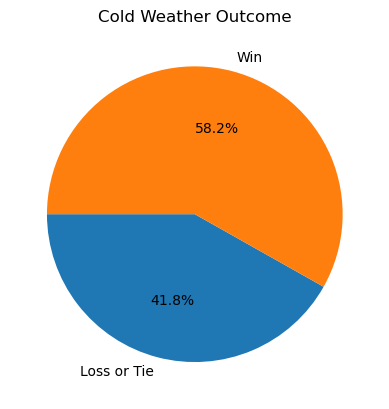

In [20]:
pie_df = data_df.groupby("stadium_weather_type")["home_result"].value_counts()
pie_df
cold_weather_df = data_df[(data_df["stadium_weather_type"] == "cold")]
cold_weather_df
cold_weather = cold_weather_df.groupby(['home_result'])['home_result'].count()
plt.pie(cold_weather, labels=('Loss or Tie', 'Win'),startangle=180, autopct='%1.1f%%')
plt.title("Cold Weather Outcome")
plt.show()

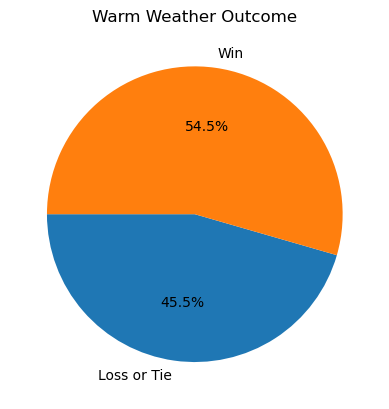

In [21]:
pie_df = data_df.groupby("stadium_weather_type")["home_result"].value_counts()
pie_df
cold_weather_df = data_df[(data_df["stadium_weather_type"] == "warm")]
cold_weather_df
cold_weather = cold_weather_df.groupby(['home_result'])['home_result'].count()
plt.pie(cold_weather, labels=('Loss or Tie', 'Win'),startangle=180, autopct='%1.1f%%')
plt.title("Warm Weather Outcome")
plt.show()

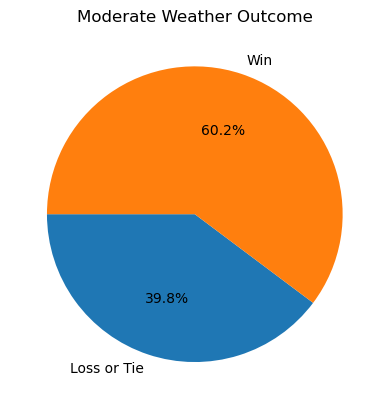

In [22]:
#pie_df = data_df.groupby("stadium_weather_type")["home_result"].value_counts()
#pie_df
cold_weather_df = data_df[(data_df["stadium_weather_type"] == "moderate")]
cold_weather_df
cold_weather = cold_weather_df.groupby(['home_result'])['home_result'].count()
plt.pie(cold_weather, labels=('Loss or Tie', 'Win'),startangle=180, autopct='%1.1f%%')
plt.title("Moderate Weather Outcome")
plt.show()

In [23]:
weather_detail_df = data_df[["home_result", "weather_detail"]] 
weather_detail_df = weather_detail_df.dropna(how='any')
weather_detail_df.value_counts()
#weather_detail_df = weather_detail_df.groupby("weather_detail")["home_result"].value_counts()
#weather_detail_df


home_result  weather_detail         
Win          indoor                     1459
Loss or Tie  indoor                     1217
Win          rain                         65
Loss or Tie  rain                         39
Win          retractable (open roof)      38
Loss or Tie  retractable (open roof)      30
Win          fog                          17
             rain | fog                   16
Loss or Tie  fog                          11
             snow                          8
Win          snow                          7
Loss or Tie  rain | fog                    6
             snow | fog                    3
Win          snow | fog                    2
             snow | Freezing rain          1
Name: count, dtype: int64

In [24]:
win_indoor = data_df[(data_df["home_result"] == "Win") & (data_df["weather_detail"] == "indoor")].count()["home_result"]
win_indoor = data_df[(data_df["home_result"] == "Win") & (data_df["weather_detail"] == "indoor")].count()["home_result"]
win_indoor
no_win_indoor = data_df[(data_df["home_result"] == "Loss or Tie") & (data_df["weather_detail"] == "indoor")].count()["home_result"]
no_win_indoor
percentage_win_indoor = win_indoor/(win_indoor + no_win_indoor)
percentage_win_indoor

0.5452167414050823

In [25]:
#weather_detail_df["weather_type"] = ""

In [26]:
weather_detail_df["weather_detail"] = weather_detail_df["weather_detail"].replace({'snow | Freezing rain': 'snow', 'snow | fog': 'snow', 'rain | fog': 'rain'})

In [27]:

weather_detail_df.value_counts()

home_result  weather_detail         
Win          indoor                     1459
Loss or Tie  indoor                     1217
Win          rain                         81
Loss or Tie  rain                         45
Win          retractable (open roof)      38
Loss or Tie  retractable (open roof)      30
Win          fog                          17
Loss or Tie  fog                          11
             snow                         11
Win          snow                         10
Name: count, dtype: int64

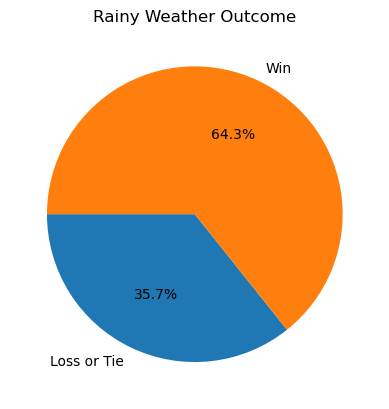

In [28]:
rain_weather_df = weather_detail_df[(weather_detail_df["weather_detail"] == "rain")]
rain_weather_df
rain_weather = rain_weather_df.groupby(['home_result'])['home_result'].count()
plt.pie(rain_weather, labels=('Loss or Tie', 'Win'),startangle=180, autopct='%1.1f%%')
plt.title("Rainy Weather Outcome")
plt.show()

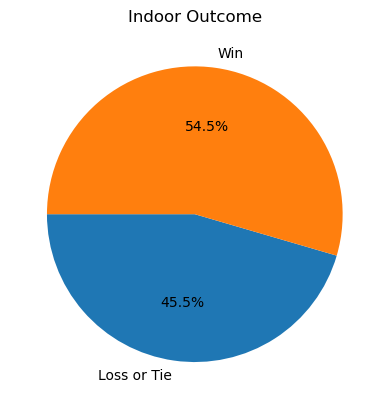

In [29]:
indoor_df = weather_detail_df[(weather_detail_df["weather_detail"] == "indoor")]
indoor_df
indoor = indoor_df.groupby(['home_result'])['home_result'].count()
plt.pie(indoor, labels=('Loss or Tie', 'Win'),startangle=180, autopct='%1.1f%%')
plt.title("Indoor Outcome")
plt.show()

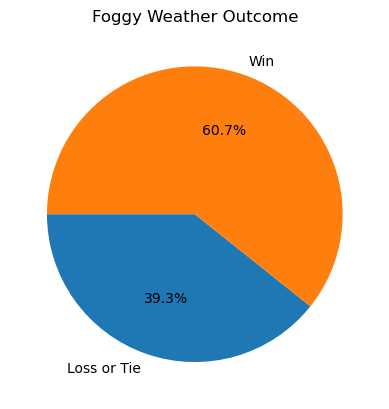

In [30]:
fog_df = weather_detail_df[(weather_detail_df["weather_detail"] == "fog")]
fog_df
fog = fog_df.groupby(['home_result'])['home_result'].count()
plt.pie(fog, labels=('Loss or Tie', 'Win'),startangle=180, autopct='%1.1f%%')
plt.title("Foggy Weather Outcome")
plt.show()

In [39]:
data_df["stadium_capacity"]
stadium_size = data_df["stadium_capacity"]
stadium_size_df = stadium_size.dropna(how='any')
stadium_size_df

4        80,735
14       93,605
21       53,250
32       80,735
33       53,250
          ...  
13589    66,200
13590    68,756
13591    65,500
13592    68,500
13593     65000
Name: stadium_capacity, Length: 7256, dtype: object

In [71]:
capacity_df = data_df[["home_result", "stadium_capacity"]] 
capacity_df = capacity_df.dropna(how='any')
capacity_df["stadium_capacity"] = capacity_df["stadium_capacity"].str.replace(',', '').astype(int)
capacity = capacity_df.groupby("home_result")["stadium_capacity"].mean()
capacity

home_result
Loss or Tie    70922.234878
Win            71199.939248
Name: stadium_capacity, dtype: float64

In [53]:
print(capacity_df.groupby(["home_result"]).agg({"stadium_capacity":["mean", "median", "var", "std", "sem"]}).reset_index())

   home_result stadium_capacity                                      \
                           mean   median           var          std   
0  Loss or Tie     70922.234878  71250.0  6.569994e+07  8105.550009   
1          Win     71199.939248  71250.0  6.954212e+07  8339.191915   

               
          sem  
0  145.392493  
1  129.480568  


In [80]:
d1 = capacity_df[(capacity_df["home_result"] == "Win")]
d2 = capacity_df[(capacity_df["home_result"] == "Loss or Tie")]
d1.stadium_capacity.mean()
d2.stadium_capacity.mean()
stats.ttest_ind(d1.stadium_capacity, d2.stadium_capacity, equal_var=False)

TtestResult(statistic=1.426392602551757, pvalue=0.15380102461884837, df=6789.837296493683)